## pyplotを用いた可視化 

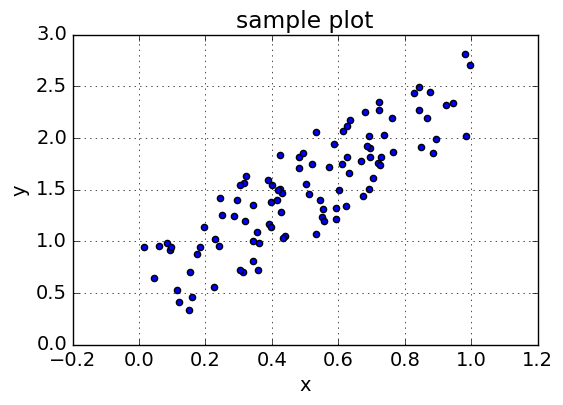

In [1]:
# 散布図のプロット
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 14   # フォントサイズ
np.random.seed(123)              # 乱数種を指定
N = 100                          # 100の一様乱数データを作成
x = np.random.rand(N)
y = 2 * x + np.random.rand(N)

plt.scatter(x, y)                # 散布図
plt.title('sample plot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()                       # グリッドを表示 
plt.show()

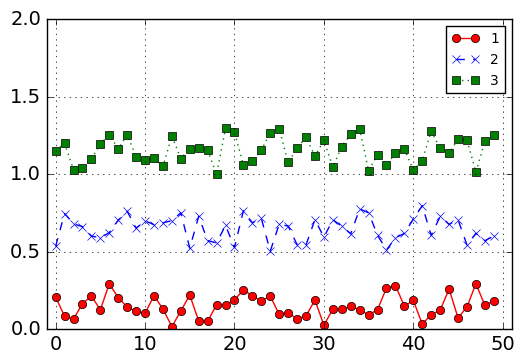

In [2]:
# 折れ線グラフのプロット
np.random.seed(123)
N = 50  # 50個の点を作成
plt.plot(0 + 0.3 * np.random.rand(N), c='r', marker='o', linestyle='-', label='1')     # plotで折れ線グラフを作成
plt.plot(0.5 + 0.3 * np.random.rand(N), c='b', marker='x', linestyle='--', label='2')
plt.plot(1 + 0.3 * np.random.rand(N), c='g', marker='s', linestyle=':', label='3')
# 色、マーカー、先の種類は 'ro-'のようにまとめて指定することも可能
plt.xlim(-1, 51)  # 軸の幅を指定
plt.ylim(0, 2.0)
plt.legend(loc='upper right', prop={'size':10}) # 凡例の位置とサイズを指定
plt.grid()
plt.show()

In [3]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

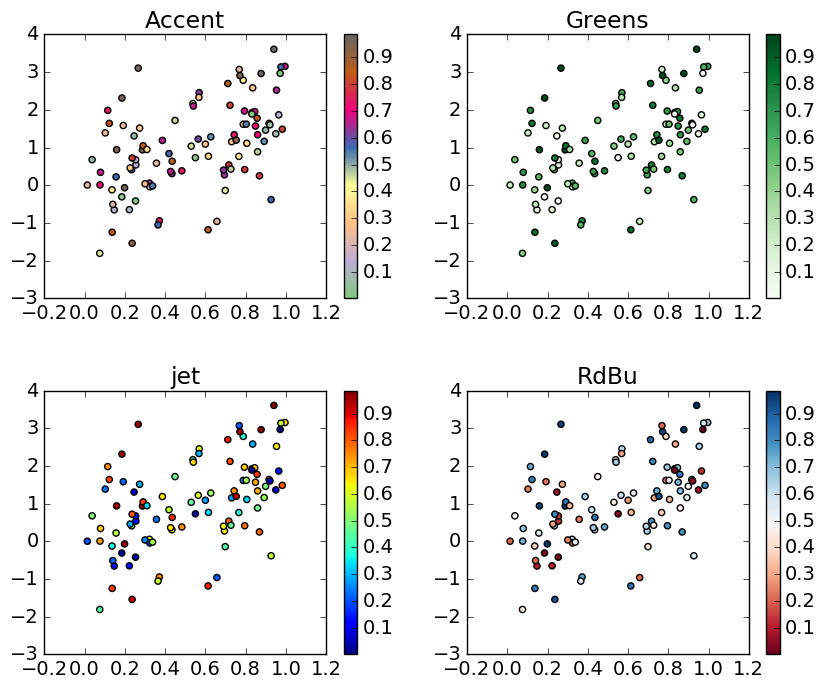

In [4]:
# カラーマップ
N = 100      # データの個数指定
np.random.seed(71)
x = np.random.rand(N)
y = 2 * x + np.random.randn(N)
c = np.random.rand(N)  # 色をランダムに指定
fig = plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1) # 複数のプロットを一つの図に収めたい時に使う。引数は（グラフの行数, グラフの列数, 何番目のプロットか）
plt.scatter(x, y, c= c, cmap=plt.cm.Accent) # cmapにカラーマップを指定
plt.title('Accent')
plt.colorbar()   # カラーバーを表示
plt.subplot(2, 2, 2)
plt.scatter(x, y, c=c, cmap=plt.cm.Greens)
plt.title('Greens')
plt.colorbar()
plt.subplot(2, 2, 3)
plt.scatter(x, y, c=c, cmap=plt.cm.jet)
plt.title('jet')
plt.colorbar()
plt.subplot(2, 2, 4)
plt.scatter(x, y, c=c, cmap=plt.cm.RdBu)
plt.title('RdBu')
plt.colorbar()
plt.subplots_adjust(hspace=0.35)
plt.show()

### 描画対象のFigureの明示

pyplotで描画を行う際、裏側ではFigureクラス（すべての描画部分）とAxes(AxesSubplot)クラス（描画に関する図形）がインスタンス化されている<br>

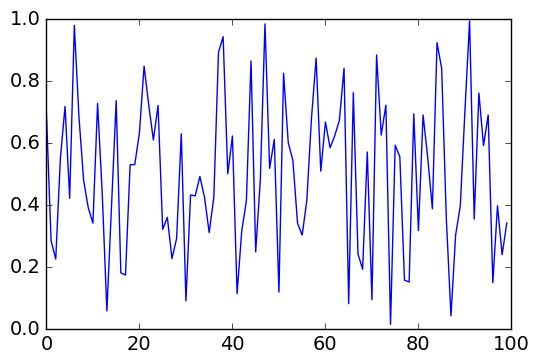

In [5]:
# 各クラスを明示的にインスタンス化し、描画
np.random.seed(123)
fig = plt.figure()  # Figureクラスをインスタンス化
ax = fig.gca()      # Axesクラスをインスタンス化
ax.plot(np.random.rand(100))
plt.show()

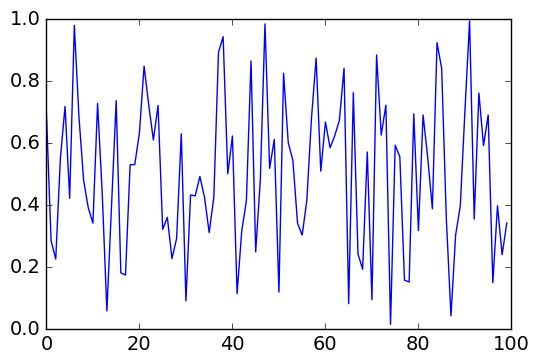

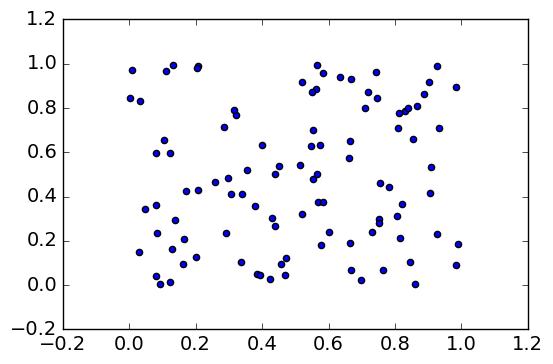

In [6]:
# 複数の図を対象とする場合、上記の方法により見通しが良くなる
# Figureの選択はfigure関数の引数により番号をを指定する
np.random.seed(123)
fig1, fig2 = plt.figure(1), plt.figure(2)
# figure1を選択
plt.figure(1)
plt.plot(np.random.rand(100))
# figure2を選択
plt.figure(2)
plt.scatter(np.random.rand(100), np.random.rand(100))
plt.show()

### 複数の図のプロット

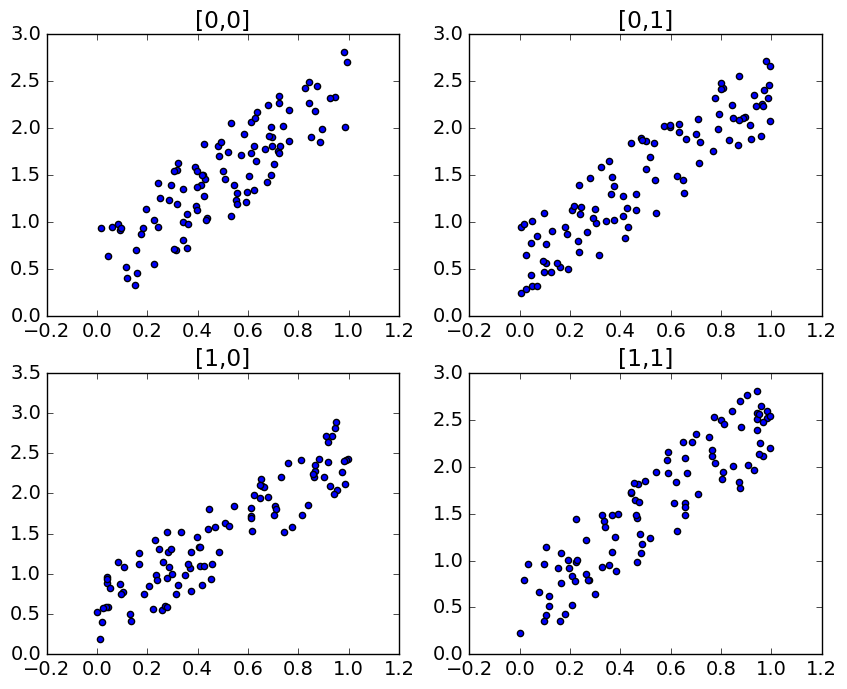

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))  # 図を2行2列に分割(※subplotではない)
N = 100
np.random.seed(123)
nrow, ncol = ax.shape # 図の行、列数を取得
# 行、列ごとに散布図をプロット
for i in range(nrow):
    for j in range(ncol):
        x = np.random.rand(N)
        y = 2 * x + np.random.rand(N)
        ax[i, j].scatter(x, y)
        ax[i, j].set_title('[' + str(i) + ',' + str(j) + ']')
        
plt.show()

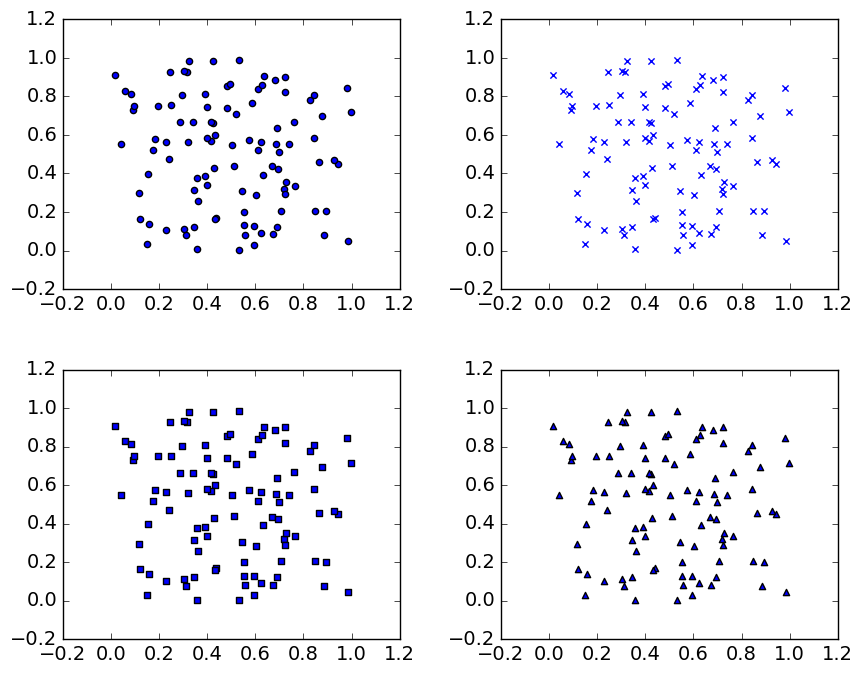

In [8]:
# subplotでも同様のことができる　この場合は引数を、行、列、何番目の画像かで指定する
np.random.seed(123)
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
plt.figure(figsize=(10, 8)) # figureクラスのサイズを指定
# 以降１つずつ散布図を作成
plt.subplot(2, 2, 1) # 1枚め
plt.scatter(x, y, marker='o')
plt.subplot(2, 2, 2) # 2枚め
plt.scatter(x, y, marker='x')
plt.subplot(2, 2, 3) # 3枚め
plt.scatter(x, y, marker='s')
plt.subplot(2, 2, 4) # 4枚め
plt.scatter(x, y, marker='^')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

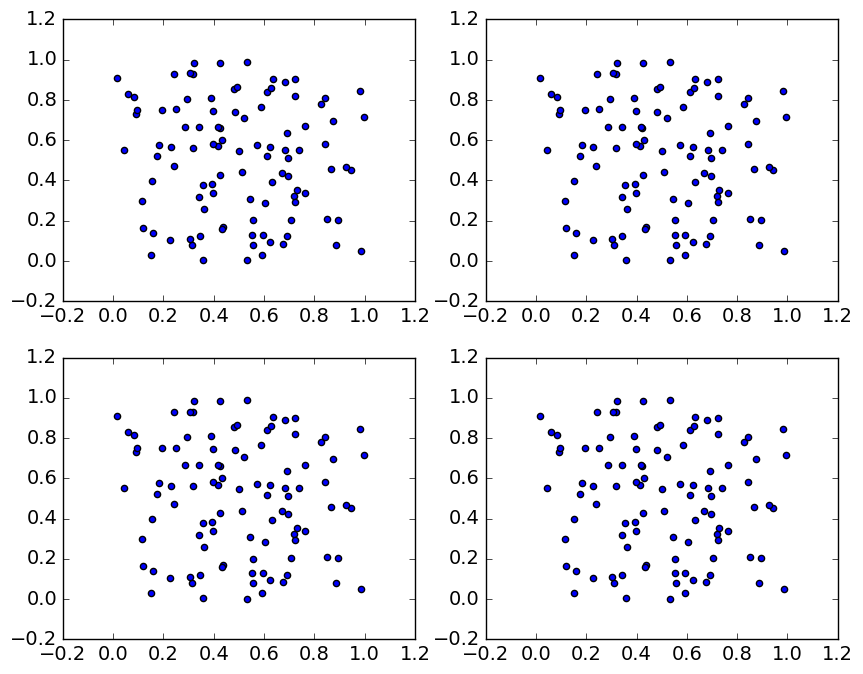

In [12]:
# add_subplotを用いてAxesSubplotクラスのインスタンスを順次追加することでも複数の図を書ける
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(x, y)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(x, y)
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(x, y)
ax4 = fig.add_subplot(2, 2, 4)
ax4.scatter(x, y)
plt.show()

### アニメーションの作成

<IPython.core.display.Javascript object>


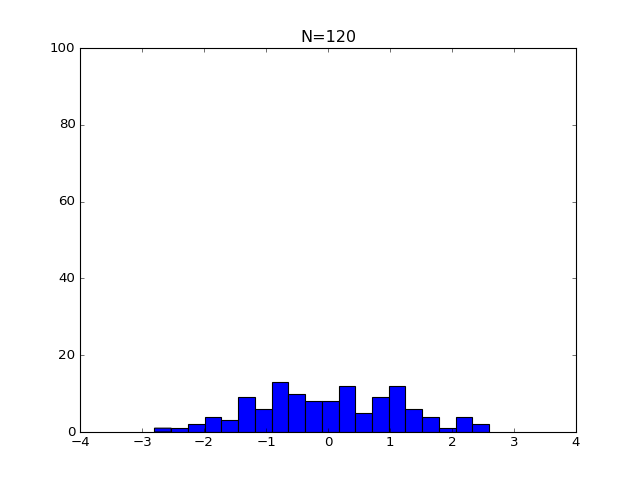

In [15]:
# 標準正規分布に従う乱数を1000個作成し、点の個数を変化させながらヒストグラムをプロットするアニメーションを作成する
%matplotlib nbagg
import matplotlib.animation as animation

N = 1000 # データの個数
np.random.seed(123)
x = np.random.randn(N) # データ生成

absmax_x = np.ceil(np.max(np.abs(x))) # ヒストグラムの軸の範囲
xmin, xmax = -absmax_x, absmax_x      # を指定

# 描画
def animate(nframe):
    plt.cla() # Axesオブジェクトをクリア
    plt.hist(x[:nframe], bins=20) # ヒストグラムの描画
    plt.xlim(xmin, xmax) # 軸の範囲を設定
    plt.ylim(0, 100)
    plt.title('N=%s' % nframe) # タイトルを設定
    
fig = plt.figure() # figureクラスをインスタンス化
# アニメをインスタンス化(Figureオブジェクト, 描画関数, フレーム番号)
anim = animation.FuncAnimation(fig, animate, np.arange(1, N + 1))
# アニメーションの表示
#plt.show()
    

### 日本語フォントの設定

In [1]:
# 現在のフォントを確認
import matplotlib
matplotlib.rcParams.get('font.family')

[u'sans-serif']

In [2]:
# フォント設定のための設定ファイルのパスを確認
matplotlib.matplotlib_fname()

u'/usr/local/lib/python2.7/dist-packages/matplotlib/mpl-data/matplotlibrc'

In [3]:
# 上記ファイルを設定ディレクトリにコピーする　ディレクトリは以下で確認
matplotlib.get_configdir()

u'/home/yamada/.config/matplotlib'

コピー後、以下のように書き換える
<pre>
#font-family: sans-serif
font-family: Osaka
</pre>

In [5]:
# 利用可能なフォント一覧を表示
import matplotlib.font_manager as fm
fm.findSystemFonts()

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


[u'/usr/share/fonts/truetype/lato/Lato-Hairline.ttf',
 u'/usr/share/fonts/opentype/stix/STIXIntegralsUp-Regular.otf',
 u'/usr/share/fonts/truetype/takao-mincho/TakaoMincho.ttf',
 u'/usr/share/fonts/truetype/kacst/KacstTitle.ttf',
 u'/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-M.ttf',
 u'/usr/share/fonts/truetype/tlwg/Laksaman-BoldItalic.ttf',
 u'/usr/share/fonts/truetype/tlwg/Umpush.ttf',
 u'/usr/share/fonts/truetype/tlwg/Garuda-Bold.ttf',
 u'/usr/share/fonts/truetype/kacst/KacstLetter.ttf',
 u'/usr/share/fonts/truetype/kacst/KacstScreen.ttf',
 u'/usr/share/fonts/opentype/stix/STIXIntegralsUpSm-Regular.otf',
 u'/usr/share/fonts/truetype/tlwg/Norasi-Oblique.ttf',
 u'/usr/share/fonts/truetype/takao-mincho/TakaoPMincho.ttf',
 u'/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-BI.ttf',
 u'/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
 u'/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 u'/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',
 u'/usr/share/fonts